In [129]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.tokenize import WordPunctTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk.classify.util
from nltk.classify import MaxentClassifier
import random
from sklearn.model_selection import train_test_split
import multiprocessing
from gensim.models import Word2Vec
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix
import pandas as pd
import os
import re
import spacy
from gensim.models.phrases import Phrases, Phraser
from time import time 
import multiprocessing
from gensim.models import Word2Vec
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
import keras 
from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Embedding
from keras.layers.merge import Concatenate
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix
import gensim
from sklearn import preprocessing
#import sequence
from keras.layers.recurrent import LSTM

In [130]:
cols=['tweet','tag','n']
df=pd.read_csv("./FinalTweetList.csv",names=cols)
df=df.drop(df.columns[2],axis=1)
df

,tweet,tag
0,@ICICIBank_Care Bank employees of 21 c Faridab...,displeasure
1,@AxisBankSupport 18..233.... is permanently bu...,displeasure
2,"@TheOfficialSBI 3 hours in line,still waiting....",displeasure
3,@HDFCBank_Cares Both the ATM machines here in ...,displeasure
4,@ICICIBank Thanks icici bank I got case in you...,miscellaneous
...,...,...
5689,@HDFCBank_Cares over 25 calls this week.I gues...,displeasure
5690,@ICICIBank_Care e-Pay slip as system not worki...,displeasure
5691,@TheOfficialSBI staff at Sbi Akaltara branch C...,miscellaneous
5692,"@singhraviranja4 @AxisBankSupport Hi, sorry fo...",miscellaneous


In [131]:
#cleaning the twitter data
def remove_stopwords(tweet):
    #removing stopwords
    stop_words = set(stopwords.words('english')) 
    #tokenizing tweets using nltk tokenizer
    word_tokens = word_tokenize(tweet) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)
#function for cleaning the tweets
def clean(tweet):
    #converting all the words to lowercase
    tweet=tweet.lower()
    tweet=tweet.lstrip()
    tweet=tweet.rstrip()
    #tweet=remove_stopwords(tweet)
    tweet=re.sub('https.*','',tweet)
    '''negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
    neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], tweet)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)'''
    words = [x for x  in WordPunctTokenizer().tokenize(tweet) if len(x) > 1]
    return words
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [132]:

'''def segregate(df):
    banks=[]
    tweets=[]
    hashtags=[]
    a=re.findall("@\w+", df['tweet'][0])
    for i in df['tweet']:
        #print(i)
        bank=re.search("@\w+", i)
        if bank:
            banks.append(bank.group())
        else:
            banks.append('dk')
        hashtag=re.findall("#\w+", i)
        #print(hashtag)
        if hashtag:
            hashtags.append(hashtag)
        else:
            hashtags.append('no hashtags')
        tweet=re.sub(r'@[A-Za-z0-9_]+','',i)
        tweet=clean(tweet)
        tweets.append(tweet)
    
    df=df.drop(df.columns[0],axis=1)
    df['bank']=banks
    df['tweets']=tweets
    df['hashtags']=hashtags
    return df
'''
df["tweet"][200]

"Why still bank ATM'S r not working.When @narendramodi Has announced\n@arunjaitley @RBI @TheOfficialSBI @ICICIBank @HDFC_Bank @AxisBankSupport"

In [133]:
df['tweet'] = df['tweet'].map(lambda x: clean(x))


In [134]:
df["tweet"][200]

['why',
 'still',
 'bank',
 'atm',
 'not',
 'working',
 'when',
 'narendramodi',
 'has',
 'announced',
 'arunjaitley',
 'rbi',
 'theofficialsbi',
 'icicibank',
 'hdfc_bank',
 'axisbanksupport']

In [135]:
train,test = train_test_split(df, test_size = 0.0878, random_state = 0)
train

,tweet,tag
3770,"[theofficialsbi, please, start, separate, desk...",miscellaneous
1979,"[rt, ipravinn, axisbanksupport, axisbank, what...",displeasure
5338,"[of, 10, atms, ive, been, to, so, far, includi...",displeasure
1949,"[theofficialsbi, have, pathetic, online, banki...",displeasure
5500,"[hdfc_bank, hdfcbank_cares, and, it, happened,...",displeasure
...,...,...
4931,"[theofficialsbi, susmita05787706, sir, .., tod...",miscellaneous
3264,"[hdfcbank_cares, poor, service]",displeasure
1653,"[rt, h_s1ngh, pathetic, experience, icicibank_...",displeasure
2607,"[theofficialsbi, can, request, for, demand, dr...",miscellaneous


In [136]:
training_set=[]
testing_set=[]
for i in range(len(train)):
    training_set.append((train.iloc[i][0],train.iloc[i][1]))
for i in range(len(test)):
    testing_set.append((test.iloc[i][0],test.iloc[i][1]))
training_set


[(['theofficialsbi',
   'please',
   'start',
   'separate',
   'desk',
   'for',
   'very',
   'poor',
   'people',
   'for',
   'opening',
   'new',
   'accounts',
   'and',
   'for',
   'depositing',
   'their',
   'money',
   'also',
   'issue',
   'rupay'],
  'miscellaneous'),
 (['rt',
   'ipravinn',
   'axisbanksupport',
   'axisbank',
   'what',
   'nonsense',
   'is',
   'this',
   'text',
   'abt',
   'bank',
   'being',
   'open',
   'till',
   '6pm',
   'at',
   '57',
   'pm',
   'wow',
   'blackmoney'],
  'displeasure'),
 (['of',
   '10',
   'atms',
   'ive',
   'been',
   'to',
   'so',
   'far',
   'including',
   'icicibank',
   'nt',
   'one',
   'has',
   'cash',
   'theofficialsbi',
   'accepting',
   'only',
   'sbi',
   'card',
   'pmoindia',
   'rbi',
   'what',
   'do',
   'do'],
  'displeasure'),
 (['theofficialsbi', 'have', 'pathetic', 'online', 'banking', 'servicing'],
  'displeasure'),
 (['hdfc_bank',
   'hdfcbank_cares',
   'and',
   'it',
   'happened',
   '

In [137]:
def list_to_dict(words_list):
  return dict([(word, True) for word in words_list])

training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in training_set]
test_set_formatted = [(list_to_dict(element[0]), element[1]) for element in testing_set]

test_set_formatted

[({'theofficialsbi': True,
   'one': True,
   'of': True,
   'official': True,
   'working': True,
   'at': True,
   'patna': True,
   'main': True,
   'branch': True,
   'gav': True,
   'such': True,
   'an': True,
   'awful': True,
   'response': True,
   'amp': True,
   'didn': True,
   'exchange': True,
   'while': True,
   'he': True,
   'does': True,
   'for': True,
   'his': True,
   'relatives': True},
  'displeasure'),
 ({'rt': True,
   'savvyv10': True,
   'theofficialsbi': True,
   'niranjan': True,
   'hiranandani': True,
   'defaulted': True,
   'nri': True,
   'buyers': True,
   'delayed': True,
   'project': True,
   'panvel': True,
   'named': True,
   'hfc': True,
   'highjacked': True,
   'by': True,
   'nh': True,
   'no': True},
  'miscellaneous'),
 ({'the': True,
   'attitude': True,
   'of': True,
   'statebank': True,
   'employee': True,
   'complete': True,
   'post': True,
   'here': True,
   'pmoindia': True,
   'theofficialsbi': True},
  'miscellaneous'),
 (

In [138]:
numIterations = 10
algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]
classifier = nltk.MaxentClassifier.train(training_set_formatted, algorithm, max_iter=numIterations)
classifier.show_most_informative_features(10)

  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -1.09861        0.392
             2          -1.09781        0.664
             3          -1.09700        0.664
             4          -1.09620        0.664
             5          -1.09540        0.664
             6          -1.09460        0.664
             7          -1.09380        0.665
             8          -1.09301        0.665
             9          -1.09221        0.665
         Final          -1.09142        0.665
  -0.004 amount==True and label is 'compliment'
  -0.004 yet==True and label is 'compliment'
  -0.004 online==True and label is 'compliment'
  -0.004 non==True and label is 'compliment'
  -0.004 still==True and label is 'compliment'
  -0.004 dear==True and label is 'compliment'
  -0.004 email==True and label is 'compliment'
  -0.004 close==True and label is 'compliment'
  -0.004 ???==True and label is 'compliment

In [186]:
classifier.show_most_informative_features(10)

  -0.004 amount==True and label is 'compliment'
  -0.004 online==True and label is 'compliment'
  -0.004 non==True and label is 'compliment'
  -0.004 still==True and label is 'compliment'
  -0.004 email==True and label is 'compliment'
  -0.004 dear==True and label is 'compliment'
  -0.004 close==True and label is 'compliment'
  -0.004 pathetic==True and label is 'miscellaneous'
  -0.004 pathetic==True and label is 'compliment'
  -0.004 open==True and label is 'compliment'


In [151]:
count=0
for review in test_set_formatted:
    label = review[1]
    text = review[0]
    determined_label = classifier.classify(text)
    #print(determined_label, label)
    if(label==determined_label):
        count=count+1
per=count*100/len(test_set_formatted)
per

57.8

In [172]:
X = df.tweet
y = df.tag
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.0878, random_state = 42)

In [63]:
tokenized = df.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
tokenized

0       [@, ICICIBank_Care, Bank, employees, of, 21, c...
1       [@, AxisBankSupport, 18..233, ..., ., is, perm...
2       [@, TheOfficialSBI, 3, hours, in, line, ,, sti...
3       [@, HDFCBank_Cares, Both, the, ATM, machines, ...
4       [@, ICICIBank, Thanks, icici, bank, I, got, ca...
                              ...                        
5689    [@, HDFCBank_Cares, over, 25, calls, this, wee...
5690    [@, ICICIBank_Care, e-Pay, slip, as, system, n...
5691    [@, TheOfficialSBI, staff, at, Sbi, Akaltara, ...
5692    [@, singhraviranja4, @, AxisBankSupport, Hi, ,...
5693    [@, TheOfficialSBI, @, RBI, @, FinMinIndia, an...
Length: 5694, dtype: object

In [60]:
token = keras.preprocessing.text.Tokenizer()
train_seq_x=token.fit_on_texts(df['tweet'])
word_index = token.word_index

In [159]:
model = gensim.models.Word2Vec(tokenized, min_count =10,  size = 100, window =5,sg=1,iter=20) 

words = list(model.wv.vocab)
#print(words)
print(len(words))

w1="good"
model.wv.most_similar(positive=w1)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

1111


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  if __name__ == '__main__':


In [104]:
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)
model.wv.save_word2vec_format("embedded.txt", binary=False)

Word2Vec(vocab=1111, size=100, alpha=0.025)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


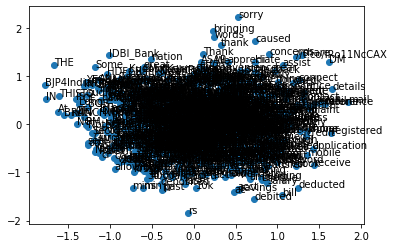

In [102]:
#import PCA
import matplotlib.pyplot as plt
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [139]:
embeddings_index = dict()
f = open('embedded.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [140]:
embedding_matrix = np.zeros((len(words), 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector


NameError: name 'words' is not defined

In [141]:
print(len(embedding_matrix))

NameError: name 'embedding_matrix' is not defined

In [142]:
## create model
model_glove = Sequential()
model_glove.add(Embedding(len(words), 100, input_length=1111, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
## Fit train data
model_glove.fit(train_x, np.array(train_y), validation_split=0.4, epochs = 3)

NameError: name 'words' is not defined

In [143]:
import numpy
def load_embedding(filename):
    # load embedding into memory, skip first line
    file = open(filename,'r')
    lines = file.readlines()[1:]
    file.close()
    # create a map of words to vectors
    embedding = dict()
    for line in lines:
        parts = line.split()
        # key is string word, value is numpy array for vector
        embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
    return embedding
 
# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = embedding.get(word)
    return weight_matrix


In [153]:
tokenizer.word_index

{}

In [155]:
# load embedding from 
vocab_size = len(tokenizer.word_index) + 1
max_length = max([len(s) for s in tokenized])
tokenizer=keras.preprocessing.text.Tokenizer()
raw_embedding = load_embedding('embedded.txt')
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
# create the embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=False)
 
# define model
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(train["tweet"], train["tag"], epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(test["tweet"],test["tag"], ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 38, 100)           100       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 34, 128)           64128     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 17, 128)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2176)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2177      
Total params: 66,405
Trainable params: 66,305
Non-trainable params: 100
_________________________________________________________________
None


ValueError: Error when checking input: expected embedding_6_input to have shape (38,) but got array with shape (1,)

In [116]:
def create_cnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_cnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("CNN, Word Embeddings",  accuracy)

NameError: name 'embedding_matrix' is not defined